In [4]:
#Importing libraries
import os
import requests
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import json
import tweepy
import re
import warnings
warnings.filterwarnings('ignore')#For not displaying warnings in the code

In [5]:
#Getting the image-predictions file 
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
folder_name = 'image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [6]:
#Creating a response variable and checking if teh response code in 200 which means successful
response=requests.get(url)
response

<Response [200]>

In [7]:
#Writing the .tsv file to the folder
with open (os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
        file.write(response.content)

In [8]:
#Creating a dataframe for the image prediction tsv file downloaded 
image_pred=pd.read_csv('image_prediction/image-predictions.tsv',sep="\t")

In [9]:
#Creating a dataframe for the twitter_enhanced csv  file
twitter_enhanced_df=pd.read_csv('twitter-archive-enhanced.csv')

In [10]:
#Shape of the dataframe twitter_enhanced
twitter_enhanced_df.shape

(2356, 17)

In [11]:
#Twitter API realted keys and authentication

consumer_key = 'Consumer Key'
consumer_secret = 'Consumer Secret'
access_token = 'Access Token'
access_secret = 'Access Secret'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,wait_on_rate_limit =True,wait_on_rate_limit_notify =True)

In [22]:
#Using the twitter API tweepy to get the data for tweets in the twitter_enhanced dataframe
missing_tweets=[]
with open(os.path.join(os.getcwd(),'tweet_json.txt'),mode='w') as file:
    for tweet_id in twitter_enhanced_df.tweet_id:
        try:
            tweet=api.get_status(tweet_id,tweet_mode='extended')
            tweet_json=json.dumps(tweet._json)
            file.write(tweet_json + '\n')
        except:
            print('Tweet not found')
            missing_tweets.append(tweet_id)

Tweet not found
Tweet not found
Tweet not found
Tweet not found
Tweet not found
Tweet not found
Tweet not found
Rate limit reached. Sleeping for: 468
Tweet not found
Tweet not found
Tweet not found
Rate limit reached. Sleeping for: 729
Rate limit reached. Sleeping for: 730


In [ ]:
#Number of tweets that haven't been downloaded from the tweepy API
len(missing_tweets)

In [12]:
#Creating a single list with all the JSON objects from the text file
data = []
with open('tweet_json.txt') as f:
    for line in f:
        data.append(json.loads(line))

In [13]:
#Creating a data frame from the list which contains multiple JSON objects 
df_list=[]
for i, id in enumerate(data["id"] for data in data): 
    tweet_id=data[i]["id"]
    favorite_count=data[i]["favorite_count"]
    retweet_count=data[i]["retweet_count"]
    followers_count=data[i]["user"]['followers_count']
    df_list.append({'tweet_id': int(tweet_id),
               'favorite_count': int(favorite_count),
               'retweet_count': int(retweet_count),
               'followers_count':int(followers_count)})
tweet_df = pd.DataFrame(df_list, columns = ['tweet_id', 'favorite_count', 'retweet_count','followers_count']) 

# Assess

In [14]:
#Looking into the data twitter_enhanced data frame

twitter_enhanced_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
#Looking at the shape of the dataframe twitter_enhanced_df

twitter_enhanced_df.shape

(2356, 17)

twitter_enhanced_df has 2356 observations with 17 variables.

In [16]:
#Taking a look at the data types of each column in twitter_enhanced_df

twitter_enhanced_df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [17]:
#taking a look at the summary of each column
twitter_enhanced_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
#Lets take a look at the data frame derived from the twitter API
tweet_df

,tweet_id,favorite_count,retweet_count,followers_count
0,892420643555336193,39101,8695,5794845
1,892177421306343426,33487,6383,5794845
2,891815181378084864,25239,4241,5794845
3,891689557279858688,42465,8795,5794845
4,891327558926688256,40618,9576,5794845
5,891087950875897856,20374,3178,5794845
6,890971913173991426,11946,2115,5794845
7,890729181411237888,66064,19275,5794845
8,890609185150312448,27976,4339,5794845
9,890240255349198849,32191,7566,5794845


In [19]:
#Lets look at the shape of the dataframe tweet_df
tweet_df.shape

(2346, 4)

This dataframe contains 2346 observations and 4 variables. There are 10 missing TweetId(s) as compared to the Twitter_enchanced dataframe. This is because the data is now not available for extraction from tweepy.

In [20]:
#Looking at the data types of the columns in tweet_df
tweet_df.dtypes

tweet_id           int64
favorite_count     int64
retweet_count      int64
followers_count    int64
dtype: object

In [21]:
#Lets look at the summary of the tweet_df
tweet_df.describe()

,tweet_id,favorite_count,retweet_count,followers_count
count,2.346000e+03,2346.000000,2346.000000,2.346000e+03
mean,7.423380e+17,8114.305200,3064.989344,5.794864e+06
std,6.835504e+16,12198.269083,5089.444256,4.950165e+01
min,6.660209e+17,0.000000,0.000000,5.794678e+06
25%,6.783824e+17,1410.250000,612.250000,5.794814e+06
50%,7.189556e+17,3562.500000,1434.000000,5.794855e+06
75%,7.987010e+17,10045.250000,3573.750000,5.794909e+06
max,8.924206e+17,144167.000000,78219.000000,5.794939e+06


In [22]:
#Different values for names of dogs in the twitter_enhanced
twitter_enhanced_df.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
the            8
Sadie          8
Bailey         7
Buddy          7
an             7
Toby           7
Daisy          7
Oscar          6
Milo           6
Scout          6
Leo            6
Jax            6
Jack           6
Rusty          6
Stanley        6
Dave           6
Bella          6
Koda           6
Bentley        5
            ... 
Jessiga        1
Gustaf         1
Bluebert       1
River          1
Daniel         1
Jockson        1
Jameson        1
Lillie         1
Joshwa         1
Torque         1
Beebop         1
JD             1
Wishes         1
Tebow          1
Stewie         1
Sage           1
Cuddles        1
Bruno          1
Chuck          1
Rorie          1
Evy            1
Ralphie        1
Tango          1
Tilly          1
Halo           1
Ito            1
Flash          1
Walker        

In [23]:
#Looking at the data with rating numerator in ascending order.

twitter_enhanced_df.sort_values(by=['rating_numerator'])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
1446,696490539101908992,6.964887e+17,4.196984e+09,2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After reading the comments I may have overesti...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1869,675153376133427200,NaN,NaN,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376...,1,10,None,None,None,None,None
2091,670783437142401025,NaN,NaN,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Flamboyant pup here. Probably poisonous. Won't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670783437...,1,10,None,None,None,None,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None


In [24]:
#Looking at the dog names which are in lower letter because it is not the real name
twitter_enhanced_df.loc[(twitter_enhanced_df.name.str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [27]:
##Looking at tweets which have fractions in ratings for the text

twitter_enhanced_df.loc[twitter_enhanced_df.text.str.contains(r"(\d+\.\d*\/\d+)")].text


45      This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948                         
340     RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…                     
695     This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                 
763     This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
1689    I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace                                                       
1712    Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD                                    

In [28]:
#While looking at the data in google sheets i found that for one of the dog the rating was from the store name 7/11
twitter_enhanced_df.query("name=='Darrel'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7,11,Darrel,None,None,None,None


In [29]:
#Looking at the source of tweets
twitter_enhanced_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

#### Quality issues:

- Incorrect names of dogs.
- Retweet related columns are not needed as they contain duplicate information. Because it contains the data about a tweet that has been retweeted.
- Dogs with rating_denominator of 0 is incorrect. Since I want to take a ration of dog ratings for analysis.
- Truncated text in the tweet text.
- Missing values in the Dog types columns i.e. Doggo,floffer, pupper, puoppo.
- Missing values in the expanded url field in the twitter_enhanced_archive which is the image file of the tweets.
- The rating has been taken from the Text of dog which says that the dog is a 3 1/2 legged dog
- The rating of dog has been taken from the store name 7/11
- The rating of dog which has 24/7 in the text description
- For dogs which have a decimal number in their ratings , the rating_numerator is incorrect.
- Ten missing records in the data obtained from the Twitter API as compared to twitter_enhanced dataframe
- Wrong data type for the column timestamp it should be a datetime instead.


#### Tidiness Issues:

- Combining the dog type column to a singe column instead of 4 different colunmn in the twitter_enhanced_df
- Combining the twitter_enhanced , tweet_df and image prediction dataframes into 1 dataframe using tweet_id as join condition.

# Clean

In [25]:
#To display the full text in the text column
pd.set_option('display.max_colwidth', -1)

In [31]:
#Creating copy of the datasets for cleaning purpose
twitter_enhanced_df_clean=twitter_enhanced_df.copy()
tweet_df_clean=tweet_df.copy()
image_pred_clean=image_pred.copy()

##### Define
Removing the different dog type columns in the dataframe

#### Code

In [32]:
#Creating a new column with dog types
twitter_enhanced_df_clean['dog_type']=twitter_enhanced_df_clean.text.str.extract('(puppo|pupper|floofer|doggo)',expand=True)

In [33]:
#Dropping the different dog type columns from the dataframe
c=['doggo','floofer','pupper','puppo']
twitter_enhanced_df_clean=twitter_enhanced_df_clean.drop(c,axis=1)

#### Test

In [34]:
# To check if the dog types columns have been removed

twitter_enhanced_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_type                      399 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


### Define

 Updating the dog names where the names start with lower case alphabets.

#### Code

In [35]:
#Change the Name of the dogs whose names start with lower case to None
twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean['name'].str.islower()==True,'name']="None"

#### Test

In [36]:
#To check if there are any names which start with lower case
twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean.name.str.islower()==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type


In [37]:
twitter_enhanced_df_clean.name.value_counts()

None         854
Charlie      12 
Cooper       11 
Lucy         11 
Oliver       11 
Tucker       10 
Lola         10 
Penny        10 
Winston      9  
Bo           9  
Sadie        8  
Buddy        7  
Daisy        7  
Toby         7  
Bailey       7  
Koda         6  
Bella        6  
Oscar        6  
Jack         6  
Jax          6  
Leo          6  
Milo         6  
Stanley      6  
Rusty        6  
Dave         6  
Scout        6  
Sunny        5  
Chester      5  
Phil         5  
Oakley       5  
            ..  
Tripp        1  
Socks        1  
Jessiga      1  
Lance        1  
Bluebert     1  
River        1  
Jockson      1  
Jameson      1  
Lillie       1  
Rorie        1  
Beebop       1  
JD           1  
Wishes       1  
Tebow        1  
Stewie       1  
Sage         1  
Cuddles      1  
Bruno        1  
Joshwa       1  
Chuck        1  
Evy          1  
Ralphie      1  
Tango        1  
Tilly        1  
Halo         1  
Ito          1  
Flash        1  
Walker       1

### Define

There are few text(s) which have names of the dogs after the text named in the twitter_enhanced_archive dataframe. Let's try to get the dog name from these texts

#### Code

In [38]:
# Replacing the name of the dog after **named** in the text of tweets

for txt in twitter_enhanced_df_clean.loc[(twitter_enhanced_df_clean.name=="None") & (twitter_enhanced_df_clean.text.str.contains("named\s(\w+)"))].text:
    name=re.findall(r"named\s(\w+)", txt)
    twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean['text']==txt,'name']=name
    
    


#### Test 

In [39]:
#Verifying if the names have been replaced with correct names instead of None

twitter_enhanced_df_clean.loc[(twitter_enhanced_df_clean.name=="None") & (twitter_enhanced_df_clean.text.str.contains("named\s(\w+)"))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type


In [40]:
#Checking the value counts of the names. Before doing this transformation there were 854 dogs with no names now we have 830 dogs with no name.
twitter_enhanced_df_clean.name.value_counts()

None         830
Charlie      12 
Lucy         11 
Cooper       11 
Oliver       11 
Lola         10 
Penny        10 
Tucker       10 
Winston      9  
Bo           9  
Sadie        8  
Toby         7  
Bailey       7  
Buddy        7  
Daisy        7  
Bella        6  
Leo          6  
Jax          6  
Oscar        6  
Rusty        6  
Stanley      6  
Koda         6  
Jack         6  
Milo         6  
Scout        6  
Dave         6  
Sammy        5  
Sunny        5  
Finn         5  
George       5  
            ..  
Tripp        1  
Socks        1  
Klint        1  
Lance        1  
Bluebert     1  
Jameson      1  
Rorie        1  
Emmie        1  
Bruno        1  
Ben          1  
Torque       1  
Beebop       1  
JD           1  
Wishes       1  
Tebow        1  
Stewie       1  
Sage         1  
Cuddles      1  
Joshwa       1  
Hubertson    1  
Chuck        1  
Evy          1  
Ralphie      1  
Tango        1  
Tilly        1  
Halo         1  
Ito          1  
Flash        1

#### Define

Check the dog names with length less than or equal to two and verify with the text if the names are correct.

#### Code

In [41]:
#Looking at the entries with Dog Names less than or equal to two
twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean.name.str.len()<=2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mo. No one will push him around in the grocery cart. He's quite pupset about it. 11/10 I volunteer https://t.co/feNwTq12S5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512159186944/photo/1,11,10,Mo,NaN
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,"https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1",14,10,Bo,NaN
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1",14,10,Bo,NaN
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bo. He's going to make me cry. 13/10 please get off the bus for him Carly https://t.co/U7FvBZo6Bq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/804026241225523202/photo/1,https://twitter.com/dog_rates/status/804026241225523202/photo/1,https://twitter.com/dog_rates/status/804026241225523202/photo/1",13,10,Bo,NaN
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Bo. He's a Benedoop Cumbersnatch. Seems frustrated with own feet. Portable as hell. 11/10 very solid pupper https://…,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085539872773/photo/1,11,10,Bo,pupper
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bo. He's a West Congolese Bugaboop Snuggle. Rather exotic. Master of the head tilt. 12/10 would pay to pet https://t.co/2jwxxtNzoN,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/789137962068021249/photo/1,https://twitter.com/dog_rates/status/789137962068021249/photo/1,https://twitter.com/dog_rates/status/789137962068021249/photo/1",12,10,Bo,NaN
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Bo and Ty. Bo eats paper and Ty felt left out. 11/10 for both https://t.co/1acHQS8rvK,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,"https://twitter.com/dog_rates/status/761004547850530816/photo/1,https://twitter.com/dog_rates/status/761004547850530816/photo/1",11,10,Bo,NaN
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't 

In [42]:
#For tweetid 776201521193218049 the Dog name is  O'Malley
 
twitter_enhanced_df_clean.name=twitter_enhanced_df_clean.name.replace('O', 'O\'Malley')

#### Test

In [43]:
#To check if there are no entries with Name as 'O'
twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean.name=='O']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type


In [44]:
#To check if the name of the dog with tweetid 776201521193218049 has been updated sucessfully
twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean.tweet_id==776201521193218049]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O'Malley,NaN


#### Define

Removing all the retweeted entries from the twitter_enhanced dataset because these are the entries of the tweets that have been retweeted. To remove duplicates these should be removed from the dataframe

#### Code

In [45]:
#Removing retweets that have some value i.e. the tweets that have been retweeted
#Removing the entries with non null values in retweeted_status_id column

twitter_enhanced_df_clean=twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean.retweeted_status_id.isnull()]

#### Test

In [47]:
#To check if all those tweets which were retweeted have been removed fropm the dataframe
twitter_enhanced_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_type                      364 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 254.9+ KB


### Define

Removing the retweet related columns as it does'nt have any meaningful data in it.

#### Code

In [48]:
#Dropping the retweet columns
c=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
twitter_enhanced_df_clean=twitter_enhanced_df_clean.drop(c,axis=1)

#### Test

In [49]:
twitter_enhanced_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_type                 364 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 203.9+ KB


### Define

There are few records with wrong Ratings because the text for the tweet contains multiple fraction values. 
- An example of this would be the dog is a 3 1/2 legged dog 
- Dog stole from 7/11 store. 
- Also the ratings for the dog which has 24/7 in the Text is wrong. 

#### Code

In [50]:
##Updating the rating numerator and denominator for the dog with 3 1/2 legs to the correct value
twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean.text.str.contains( "3 1/2")]
twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean.text.str.contains( "3 1/2"),'rating_numerator']=9
twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean.text.str.contains( "3 1/2"),'rating_denominator']=10

#### Test

In [51]:
# To verify if the updates to the rating_numerator, rating_denominator have been applied.

twitter_enhanced_df_clean.query("tweet_id==666287406224695296")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9,10,None,NaN


#### Code

In [52]:
#Correcting the ratin_numerator and rating_denominator for dog which stole from 7/11!!

twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean.text.str.contains( "7/11")]
twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean.text.str.contains( "7/11"),'rating_numerator']=10
twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean.text.str.contains( "7/11"),'rating_denominator']=10

#### Test

In [72]:
#Testing if the data has been corrected
twitter_enhanced_df_clean.query("tweet_id==682962037429899265")


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,10,10,Darrel,NaN


#### Code

In [75]:
#Correcting the ratin_numerator and rating_denominator for dog which has 24/7 in text

twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean.text.str.contains( "24/7")]
#Since 24/7 is not the correct rating and there is no rating available in the text , I will be updating the rating_numerator and denominator to 10
twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean.text.str.contains( "24/7"),'rating_numerator']=10
twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean.text.str.contains( "24/7"),'rating_denominator']=10

In [76]:
twitter_enhanced_df_clean.query("tweet_id==810984652412424192")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",10,10,Sam,NaN


In [82]:
#Dog with rating_denominator as 0 
twitter_enhanced_df_clean.query("rating_denominator==0")
#It seems that the rating here is incorrect . The correct rating should be 13/10
twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean['rating_denominator']==0,'rating_numerator']=13
twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean['rating_denominator']==0,'rating_denominator']=10

#### Test

In [83]:
# To verify if the changes have been applied and the ratings have been corrected for ratings with 0 as denominator
twitter_enhanced_df_clean.query("rating_denominator==0")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type


### Define

Checking if the rating of the dog with maximum rating denominator and numerator is correct or not

#### Code

In [85]:
#looking at the dogs with Maximum rating denominator

m=twitter_enhanced_df_clean.rating_denominator.max()
twitter_enhanced_df_clean.query("rating_denominator=={}".format(m))

#Seems like tha rating is correct but a point to note here is that this rating is for a group of dogs not a single dog.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,None,doggo


#### Code

In [59]:
#looking at the dogs with Maximum ratings_numerator

m=twitter_enhanced_df_clean.rating_numerator.max()
twitter_enhanced_df_clean.query("rating_numerator=={}".format(m))

#This rating numerator seems way out of range. It seems as if the intended rating was 17.76 . I will update the rating_numerator to 17.76

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10.0,Atticus,NaN


In [56]:
#Since we have decimal values in the numerator for ratings, the datatype of these columns should be converted to float
twitter_enhanced_df_clean['rating_numerator']=twitter_enhanced_df_clean.rating_numerator.astype('float')
twitter_enhanced_df_clean['rating_denominator']=twitter_enhanced_df_clean.rating_denominator.astype('float')

979    False
Name: rating_numerator, dtype: bool

In [61]:
#Updating the rating_numerator to 17.76 for the record with rating_numerator as 1776
twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean['rating_numerator']==1776,'rating_numerator']=17.76

#### Test

In [63]:
#To check if there is any entry with rating_numerator of 1776
twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean['rating_numerator']==1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type


### Define

There are few entries which have decimal ratings in the text. But for these observations the rating_numerator need to be corrected.

In [64]:
#Tweets which contain decimals in the ratings 
twitter_enhanced_df_clean[twitter_enhanced_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

#For all these records the rating_denominator is not affected but the ratings_numerator is incorrect 
#as the rating has been considered only after the decimal point

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5.0,10.0,Bella,NaN
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75.0,10.0,Logan,NaN
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27.0,10.0,Sophie,NaN
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,5.0,10.0,None,NaN
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26.0,10.0,None,pupper


#### Code

In [66]:
#Updated the rating_numerator for records with have decimal value in the text description

twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean['tweet_id']==883482846933004288,"rating_numerator"]=13.5
twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean['tweet_id']==786709082849828864,"rating_numerator"]=9.75
twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean['tweet_id']==778027034220126208,"rating_numerator"]=11.27
twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean['tweet_id']==681340665377193984,"rating_numerator"]=9.5
twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean['tweet_id']==680494726643068929,"rating_numerator"]=11.26

#### Test

In [67]:
#Checking the rating numerator has been updated.
twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean['tweet_id']==883482846933004288]
twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean['tweet_id']==786709082849828864]
twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean['tweet_id']==778027034220126208]
twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean['tweet_id']==681340665377193984]
twitter_enhanced_df_clean.loc[twitter_enhanced_df_clean['tweet_id']==680494726643068929]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10.0,None,pupper


In [68]:
twitter_enhanced_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null float64
name                     2175 non-null object
dog_type                 364 non-null object
dtypes: float64(4), int64(1), object(6)
memory usage: 203.9+ KB


### Define

Data types for Dog_types and timestamp needs to be changed. Currently Dog type is a string column but since it represents a categorical value this needs to be changed to category data type. 
Timestamp is currenly a string type coulmn , this too needs to be converted to datetime for further analysis.

#### Code

In [110]:
#Changing the datatype of dog_type
twitter_enhanced_df_clean['dog_type']=twitter_enhanced_df_clean['dog_type'].astype('category')
twitter_enhanced_df_clean['timestamp']=pd.to_datetime(twitter_enhanced_df_clean['timestamp'])

#### Test

In [70]:
twitter_enhanced_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null float64
name                     2175 non-null object
dog_type                 364 non-null object
dtypes: float64(4), int64(1), object(6)
memory usage: 203.9+ KB


### Define

Combining the 3 datasets together on the tweet_id column

#### Code

In [72]:
#Joining the twitter_enhanced_df_clean and tweet_df_clean on tweet_id
twitter_combine_df=pd.merge(twitter_enhanced_df_clean,tweet_df_clean,left_on='tweet_id',right_on='tweet_id',how='inner')

#### Test

In [73]:
#Check if columns related to the tweet_df have been added
twitter_combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null float64
name                     2175 non-null object
dog_type                 364 non-null object
favorite_count           2175 non-null int64
retweet_count            2175 non-null int64
followers_count          2175 non-null int64
dtypes: float64(4), int64(4), object(6)
memory usage: 254.9+ KB


#### Code

In [75]:
#Combing the above created df with image_pred dataframe
tweet_master_df=pd.merge(twitter_combine_df,image_pred_clean,left_on='tweet_id',right_on='tweet_id',how='inner')

#### Test

In [76]:
#Check if the new columns have been added in the dataframe
tweet_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1994 non-null object
dog_type                 326 non-null object
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
followers_count          1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1

## Store

In [77]:
#Write data from the tweet_master_df to tweet_archive_master.csv
tweet_master_df.to_csv('twitter_archive_master.csv')

## Analyze

In [78]:
tweet_master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In my data analysis on the We rate dogs tweets I will be mainly focussing on finding realtionship betwen retweet counts and followers count. Distribution of rating_numerator and rating_denominator. I will also like to undertand the various sources of tweets. So let's begin!

At first I want to look at the distribution of rating_numerator and rating_ratio the new variable which I have created. This variable is simply the ration betwen rating_numerator and rating_denominator from the original dataframe

In [79]:
#Creating a rating ration variable for further analysis
tweet_master_df['rating_ratio']=tweet_master_df['rating_numerator']/tweet_master_df['rating_denominator']

Text(0.5,1,'Distribution of Rating numerator')

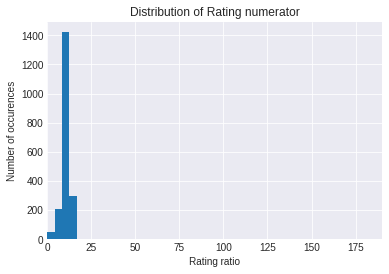

In [141]:
# Rating numerator and denominator distribution
#tweet_master_df.rating_numerator.plot(kind="hist")
bin_size = 100
plt.hist(tweet_master_df.rating_numerator,bin_size)
plt.xlim(0,190)
plt.xlabel("Rating ratio")
plt.ylabel("Number of occurences")
plt.title("Distribution of Rating numerator")

Seems like most of the dogs have a rating numerator less than 190. Many dogs have rating numerator of around 10. Lets have a look at the rating ration.

(0, 10)

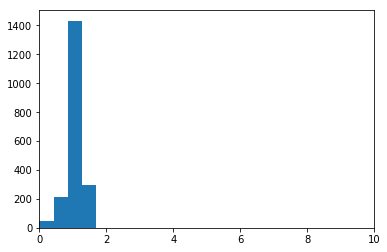

In [105]:
bin_size = 100
plt.hist(tweet_master_df.rating_ratio,bin_size)
plt.xlim(0,10)

Again, here also there is no notable anamolies. Most of the dogs have a rating ratio of 1.

Text(0.5,1,'Number of tweets from each source')

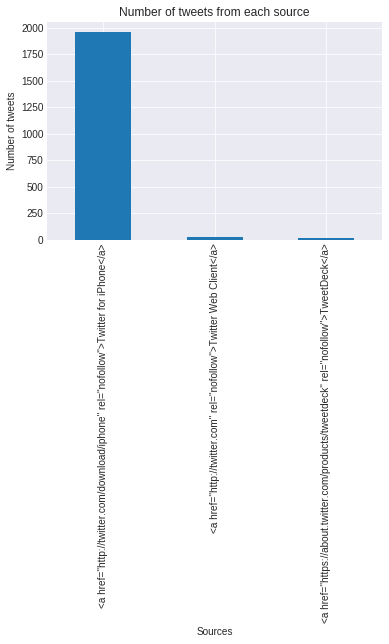

In [144]:
#Number of records from each source
tweet_master_df.source.value_counts().plot(kind="bar")

plt.ylabel("Number of tweets")
plt.xlabel("Sources")
plt.title("Number of tweets from each source")
#tweet_master_df.info()

Source of most of the tweets is from the Twitter for iphone , followed by twitter from web browser, followed by Tweet Deck. 

Let's take a look at the realtionship betwen followers count and favorite count. Favorite count is the number of likes each tweet has recieved. I want to see if high number of followers helps in getting high number of likes.

Text(0.5,0.98,'')

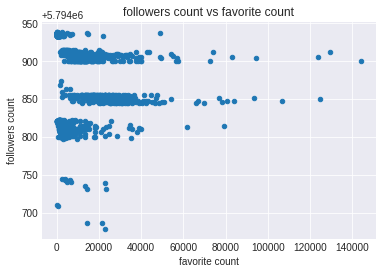

In [131]:
#Relationship between favorite_count and followers_count
tweet_master_df.plot(x="favorite_count",y="followers_count",kind="scatter")
plt.xlabel("favorite count")
plt.ylabel("followers count")
plt.title("followers count vs favorite count")
plt.suptitle("")
plt.figure(figsize=(10,10))

As seen above as the number of followers increases the favorite count is also increasing. But the favorite counts is almost nearly the same for dogs with less number of followers.

Now let's have a look at the relationship between followers count and retweet count. As per the common notion more the number of followers higher should be the retweet count. 
Let's see if this holds true for our dataset

Text(0.5,1,'Followers Count vs Retweet Count')

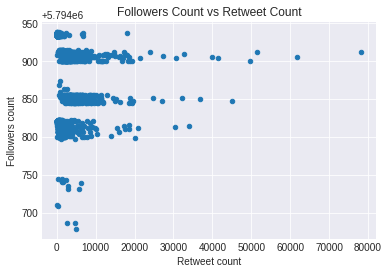

In [134]:
#Realtionship between retweet_count and followers_count 
tweet_master_df.plot(x="retweet_count",y="followers_count",kind="scatter")
plt.xlabel("Retweet count")
plt.ylabel("Followers count")
plt.title("Followers Count vs Retweet Count")
plt.figure(figsize=(10,10))

As seen above also as the followers count has increased the retweet counts have increased. Again when the retweet counts are less for dogs who have lesser number of followers. One more notable anamoly here is in case of dogs with high number of followers also the retweet counts are less.

The next relationship I want to see is if the followers_count has any impact on rating_ratio of the dogs. I am expecting that the high rated dogs might be attracting more number of people to follow them.
But let's see how the realationship looks like in reality.

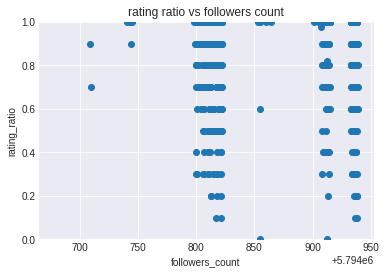

In [143]:
#Relationship between followers count and rating ratio
plt.scatter(tweet_master_df.followers_count,tweet_master_df.rating_ratio)
plt.xlabel("followers_count")
plt.ylabel("rating_ratio")
plt.title("rating ratio vs followers count")
plt.ylim(0,1)
plt.figure(figsize=(10,10))

Well from the plot above there doesn't seem to be any strong relationship between rating ratio and followers count. 
There are few dogs with hig rating ratio but very few followers. This is possible because it is the owner of the dogs who assign them the ratings not the twitter users.

Now I want to take a look at the rating ration distribution of the different dog types. 
I want to see if any particulatr dog type is more favorable to get higher rating and how does the mean, median, and IQR range of rating ratio for each of the dog types.

Text(0.5,1,'Distribution of rating ratio ve Dog Type')

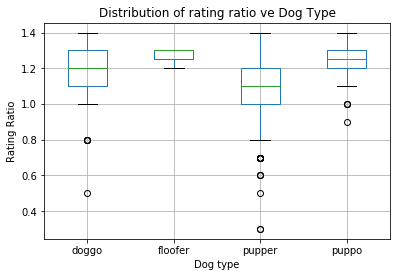

In [110]:
tweet_master_df.dog_type.value_counts()
tweet_master_df.boxplot(column='rating_ratio', by='dog_type')
plt.xlabel("Dog type")
plt.ylabel("Rating Ratio")
plt.suptitle("")
plt.title("Distribution of rating ratio vs Dog Type")

This graph here shows that the median rating ration for puppo dog types is the highest where as for pupper is the lowest. Each of the dog types with exception of floofer have outliers. There is very low variablity in the dog rating for dog type floofer